<a href="https://colab.research.google.com/github/wnyngj/class2022spring/blob/main/audio_processing0425%2C27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Processing
---

https://musiclab.chromeexperiments.com/Spectrogram/

한 장:스펙트럼

x축: 시간, y축: 주파수

하프,트럼펫소리: 그 음과 공명하는 다른 음들이 동시에
=사인곡선이 여러개 동시에 나타남

### Fourier transform (분석용)
* spectrum은 주어진 signal에 대해 어떤 주파수 성분이 많이 있나?

어떤 소리에 대해 어떤 주파수의 소리가 얼만큼 들어있는가?
찔러보기. 높은 주파수를 찔렀을 때 돌아오는것이 많으면 아,높은 주파수가 많구나, 이때 complex phasor을 쓴다

* spectrogram은 spectrum을 time 축으로 concatenate한 것

여러 스펙트럼을 시간별로 합친 것
* 방법: signal (inner product) a series of complex phasors with different frequencies

-signal과 signal과 길이가 똑같은 c.p를 만들어서 inner product 하면 spectrum이 나옴
-다양한 주파수(10hz,20hz...5000hz)와 signal을 곱해서 나온 각각의 값을 새로운 좌표평면에 찍은 것=스펙트럼

* inner product는 일종의 correlation (즉, 해당 frequency가 얼마나 있는지 probing)

probing탐침: 10hz와 signal에 곱했을 때 0.001정도로 매우 작은 숫자로 나오면 이 성분이 signal에 없다는 뜻
* 왜? sine phasor 안 쓰나? phase sensitivity 때문

개념적으로는 sine을 inner product하지만 sine의 약점이 있어서 complex phasor를 써서 inner product 해주는 것

### Filter (변환용)
신호에 대해 변화를 준다 by Filter
근데 보통은 변형할땐 Function이라고 하거든, 근데 이건 왜 Filter 일까?- '특정 주파수'에 한정되기때문에 -

오케스트라에서 저음부분을 약하게 하고 싶을 때 "낮은 주파수를 작게 해주세요"
* A --> function -->  B
* signal A --> filter --> signal B
* 신호 (time function)를 입력으로 하는 함수를 filter라고 함

x축이 time

* 왜? filter 라고 부름? 이 함수의 목적이 특정 주파수에 대한 manipulation(조작)이므로.
(예: 어떤 주파수대를 작게, 크게, 통과, 제거 등)
* 방법: weighted sum of signal's shifts (두가지 방법: FIR, IIR)
signal을 shift 한 것에 b로 weighted하고 그것들을 합함

  * FIR: Y(k) = b<sub>1</sub>X(k) + b<sub>2</sub>X(k-1) + ... 
입력을 shift 한 것에 b만큼을 곱하기
이때 b1=1이고 b2부터 0이라고 하면, filter의 효과가 없음
    - Y = H * X
  * IIR: a<sub>1</sub>Y(k) + a<sub>2</sub>Y(k-1) + ... = X(k)
출력에 곱하기
이때 a1=1이고 a2부터 0이라고 하면, filter의 효과가 없음
    - Y = (1/H) * X


### Auto correlation
F0,pitch 음의 높낮이 구하기

-자기자신auto끼리 lag해서 innner product
-lag: 조금씩 옆으로 이동한 것
-자기자신 correlation =1
그러다가 correlation값 내려가다가 도로 자기자신과 두번째로 만나는 지점에 peak를 찍음
그리고 다시 peak를 만날것임

* measuring pitch / F0

### RMS: root mean square
세게 말하기

signal값이 +와-가 섞여있으므로 1. 제곱하고 2. 더한 뒤 3. 1/n한뒤, 도로 4. root씌우기 
* measuring intensity

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

### load / plot / play sound file

In [4]:
# from google.colab import files
# fn = files.upload()
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')
#librosa 음성관련 라이브러리
#샘플링 레이트= 22050개 벡터 어레이=1초에 22050개의 숫자가 있음=2.xx초

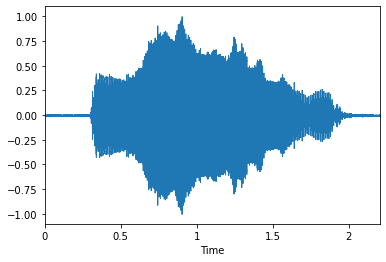

In [5]:
s = librosa.util.normalize(s)
#normalize: 모든 숫자의 절댓값, 그 중 최댓값으로 모든 숫자를 나눠줄 수 있음
#= -1과 1사이에 signal을 배열해줌
librosa.display.waveplot(s, sr)

#/a/라는 given signal
ipd.Audio(s[7000:12000], rate=sr)
#으로 다양한 frequency들의 phasor를 만들고 
#그것을 inner product해서 나오는 값을 plotting=스펙트로그램

### Fourier Transform for Spectrogram

In [ ]:
s_preemp = librosa.effects.preemphasis(s)

n_fft=512
#총 스펙트럼의 개수 = 512개 (sr22050을 같은 간격으로 512개로 나눠줌)
hop_length=int(0.001*sr)
#스펙트럼 사이 간격 = 0.001초
win_length=int(sr*0.008)
#스펙트럼 한 장의 길이= 0.008초
#한 장인 Q.008초가 0.001만큼 나아가서 여러 장이 중첩되어 스펙트로그램이 나온다. 
#스펙트로그램 = y축이 freq, 스펙트럼 = x축이 freq

#stft=Fourier Transform
# complex phasor을 inner product해서 signal을 만드는 건데 c,p니까 a+bi의 복소수 형태가 나오겠지
spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann')
magspec = np.abs(spec)
#실수a와 허수b는 순서쌍(a,b)로 좌표평면 위에 한 점으로 찍힌다. 
#abs= 이 수의 absolute 값은 원점으로부터의 거리이다.=복소수를 실수로
dBspec = librosa.amplitude_to_db(magspec, ref=np.max)
#실수값을 데시벨로

plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))

### Filter for audio transformation

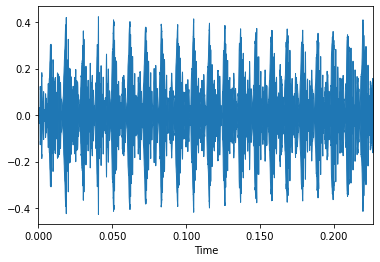

In [7]:
from scipy.signal import lfilter
sig = s[7000:12000]
#/a/소리
#sig = lfilter('FIR필터의 b부분을 np.array로', 'IIR필터의 a부분을 np.array'로, sig, axis=0)
sig = lfilter(np.array([1]), np.array([1]), sig, axis=0)
#sig = lfilter(np.array([1/2, 1/2, 1/2]) ->소리가 부드러워짐, np.array([1]), sig, axis=0)
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

### RMS(Root Mean Square) for intensity

In [ ]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

### Autocorrelation for pitch(F0) measurement

In [ ]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')